## Manejando datos con Pandas

En este notebook, aplicaremos lo aprendido para sacar información a partir de un dataset real.

Usaremos este dataset de _Kaggle_ https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows?resource=download, que contiene datos de las 1000 mejores películas y series de la historia según IMDB.

Para que no tengáis que crearos una cuenta en Kaggle, hemos subido el dataset a la página web del curso también.

_NOTA: El esquema de los datos se puede consultar en la página, pero también lo revisaremos (y adaptaremos) a lo largo de este notebook_

## Como usar este notebook
El objetivo es complementar lo visto en la clase de pandas, así que (en su mayoría) usaremos las funciones vistas ahí.

A lo largo del notebook habrá ejercicios propuestos. __El único ejercicio totalmente obligatorio es el 0, los demás pueden dejarse en blanco y el notebook seguirá siendo ejecutable. Sin embargo, deberíais ir completándolos__

__Si téneis dudas u os atascáis, ¡avisadnos!__

Un recordatorio acerca de los Notebooks: si queremos imprimir algo que está en la última fila de la celda, __no hace falta usar print()__. De hecho, para imprimir datasets de pandas, es buena idea hacerlo de esta forma en vez que usar `print(df)` en medio de la celda, ya que se imprimirá con un formato más chulo (también se puede forzar esto con `display(df)`). 

De todas formas, a veces sí usamos `print()` al final de las celdas, no es obligatorio omitirlo.

In [ ]:
# En primer lugar, importamos pandas y numpy, además de algunas librerías necesarias como os
import numpy as np
import pandas as pd
import os

In [ ]:
# Debemos configurar el path del que leeremos el dataset. 
# Por ejemplo, podemos tener este árbol de directorios:
# (DIRECTORIO BASE)
# | -- data
# | -- | imdb_top_1000.csv
# | -- | ...
# | -- notebooks
# | -- | imdb_analysis.ipynb
# | -- | ...	
# | -- ...

# Las variables en la siguiente celda de código representan este ejemplo

#### Ejercicio 0.
Ajustar las variables `DATA_FOLDER` y `path` para que apunten al fichero dónde tenemos nuestros datos.

NOTA: puede que tengáis que quitar los .. o añadir otras rutas, no hace falta seguir el esquema de directorios que hemos puesto arriba

Si tenemos los datos en el mismo directorio que este script,  `DATA_FOLDER` debería ser  `os.path.join('.')` 

In [ ]:
# Ejercicio 0. Modifica estos datos!
DATA_FOLDER = os.path.join('..', 'data')
file_name = 'imdb_top_1000.csv'
path = os.path.join(DATA_FOLDER, file_name)

In [ ]:
# Ahora podemos leer el dataset con pandas e imprimir los tipos de datos de cada columna
# Usamos .read_csv para leer el archivo csv y .dtypes para obtener los tipos de datos de cada columna
df = pd.read_csv(path)
print(df.dtypes)

## Exploración y limpieza de datos
- La primera fase de un proyecto de análisis de datos es extraer la información útil dentro de cada dataset
- A este proceso se le llama limpieza, pre-procesamiento o preparación de los datos
- Muy pocos datasets son perfectos, normalmente necesitamos adaptarlos a nuestros objetivos

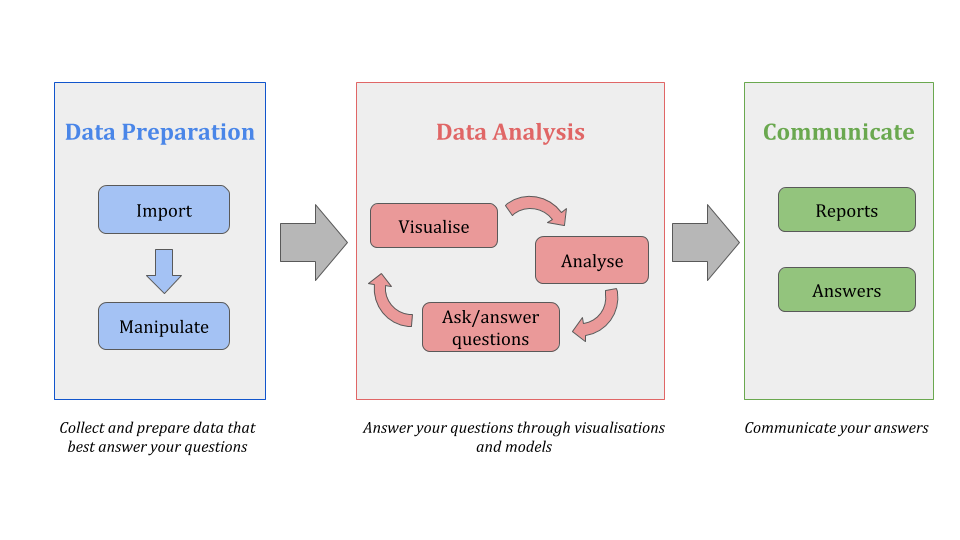

#### Ejercicio 1.

Imprime el número de filas y columnas del dataset.

Solución: 1000 filas y 16 columnas

In [ ]:
# También podemos querer ver las primeras filas del dataset para hacernos una idea de cómo es
# NOTA: usamos print aquí para poder clickar los links, pero se ve más bonito con df.head(3) directamente!
print(df.head(3))

#### Ejercicio 2.

Los links de la columna `Poster_Link` estan caídos. Elimina esta columna e imprime las 3 primeras filas de nuevo

In [ ]:
# Ahora veamos si el dataset tiene valores nulos
df.isna().sum()

In [ ]:
# En primer lugar, hay valores nulos en 'Certificate', que contiene la clasificación por edades de las películas. 
# Este valor se puede rellenar fácilmente, veamos qué tipos de valores admite esta columna
print(df['Certificate'].unique())

# Podemos entonces cambiar los valores nulos por 'Unrated'
df['Certificate'] = df['Certificate'].fillna('Unrated')

# Y ya no tenemos NaNs en la columna Certificate
print(df['Certificate'].isna().sum())

In [ ]:
filas_con_nan = df[df.isna().any(axis=1)]

# Mostramos las primeras 4 filas con NaN
print(filas_con_nan.head(4))

In [ ]:
# También tenemos valores nulos en Meta_score, que es la puntuación de las películas en Metacritic, y en Gross, 
# que es el dinero que ha recaudado la película. Imputar estos datos es más complicado, se podrían eliminar
# las filas con valores nulos, o rellenarlos con la media de la columna, por ejemplo. También podemos eliminar
# la columan entera.

# Decidimos no borrar ninguna fila para no perder los datos más importantes que usaremos 
# más adelante (título, puntuación IMDB, lista de actores y director)

#### Ejercicio 3.
Eliminar la columna de puntuación metascore e imputar Gross por el valor `"0"`.

NOTA: El nuevo dataset debería ser de tamaño (1000, 14)

In [ ]:
df.isna().sum()

In [ ]:
df[df["Series_Title"].duplicated()]

In [ ]:
# Una curiosidad es que hay 2 películas con el mismo título.
# Sin embargo, son de años distintos, así que no son datos duplicados!
print(df[df["Series_Title"] == "Drishyam"])

In [ ]:
# Hay algunos ajustes más que hacer. La columna "Gross" está en un formato inadecuado para hacer cálculos.
print(df.dtypes)
# Imprimiendo dtypes vemos que es un "object" en vez de un entero o float
# Veamos que tipo de datos tenemos aquí
print(df['Gross'].head(10)) 

In [ ]:
# Se trata de números en formato xx,xxx,xxx,xxx, que no son reconocidos como números por Python.
# Para convertirlos a números, podemos primero eliminar las comas y luego convertir a datos numéricos usando pd.to_numeric()
# La opción errors='coerce' coloca NaNs cuando no se puede realizar la conversión
df['Gross'] = df['Gross'].str.replace(',', '')
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

# El proceso funcionó perfectamente, ya que no hay NaNs tras la conversión
print(df['Gross'].isna().sum())

In [ ]:
# Runtime tiene un problema parecido, el formato es de "xx min", y no es reconocido como un número.
print(df['Runtime'].head(10))

#### Ejercicio 4.
Convierte la columna `Runtime` a un número entero representando el número de minutos que dura la película

In [ ]:
df.head(5)

In [ ]:
# Por último, observamos que en "Genre" hay varios géneros separados por comas.
# Veamos cuál es la fila con más generos. Este comando es algo más complicado (no hace falta que miréis esto en detalle) pero funciona así
# 1. df['Genere'].str saca la columna Genre como una serie de pandas (es decir, una lista de strings)
print(df['Genre'].str)
# 2. .str.split(',') divide cada string en la lista por comas, creando una lista de listas
print(df['Genre'].str.split(','))
# 3. .apply(len) aplica la función len a cada lista, devolviendo el número de elementos de cada lista
print(df['Genre'].str.split(',').apply(len))
# 4. .max() devuelve el máximo de la serie
numero_maximo_de_generos = df['Genre'].str.split(',').apply(len).max()

In [ ]:
print("Máximo de géneros por película:", numero_maximo_de_generos)	

# Ahora lo que haremos será seguir replicar la idea de poner cada actor estrella en una columna, pero para los géneros. 
# Movemos los datos en formato Genre1, Genre2, Genre3 a las columnas Genre1, Genre2 y Genre3, que son suficientes gracias al cálculo de max_genres, 
# para las películas con menos de 3 géneros, se rellenará con NaNs.
# Para manipular las strings de un dataframe, podemos usar .str, luego usamos .replace() y .split() para extraer la lista de géneros
# e.g. Drama, Action, Adventure -> Drama,Action,Adventure -> ['Drama', 'Action', 'Adventure']
# Con la opción expand=True, se rellena con NaNs cuando no hay suficientes datos en el array que devuelve .split()
df[['Genre1', 'Genre2', 'Genre3']] = df['Genre'].str.replace(' ', '').str.split(',', expand=True)
df = df.drop(columns='Genre')


In [ ]:
# Ahora cada uno de los géneros está al final del dataset en las columnas Genre1, Genre2 y Genre3
df.head(5)

In [ ]:
# Podemos ver cuántas películas tienen un solo género o solo 2 mirando la cantidad de NaNs
print("Total de películas:", df.shape[0])
print("Películas con un solo género:", df['Genre2'].isna().sum())
print("Películas con dos géneros:", df[df['Genre3'].isna() & df['Genre2'].notna()].shape[0])
print("Películas con tres géneros:", df['Genre3'].notna().sum())

# Por supuesto, el dato más importante será Genre1 ya que está disponible en todas las filas 
# NOTA: no sabemos hasta que punto Genre1 es el género "principal" de la película, los datos originales solo lo colocaban como primero en la lista dada

In [ ]:
# Para completar la limpieza inicial, vamos a ver cuántos valores únicos hay en cada columna
df.nunique()

In [ ]:
# Y también vamos a describir el dataset para ver si hay valores extraños
df.describe()

In [ ]:
# Ya tenemos todos los datos limpios, así que ahora podemos guardarlos como un nuevo archivo csv
output_path = os.path.join(DATA_FOLDER, 'imdb_top_1000_clean.csv')
print("Guardando el archivo en:", output_path)
df.to_csv(output_path, index=False)

## Análisis estadístico (descriptivo) de los datos
Ahora veamos algunos ejemplos básicos de análisis estadistico de los datos. Este dataset contiene información muy interesante y nos podemos hacer muchas preguntas:
- ¿Qué película tiene mejor puntuación?
- ¿Qué género es más popular en el top 1000?
- ¿Existen correlación entre género, duración u otros datos y puntuación de la película?
- ¿Qué actores aparecen en más películas?

¡Veamos como darle respuesta a estas preguntas!

In [ ]:
# En primer lugar, vamos a ver algunos histogramas acerca de los datos para entender mejor cómo sonç
# Normalmente esto se hace con matplotlib, que incluye muchísimos tipos de plots diferentes y configuracinones.
# Usaremos matplotlib en la siguiente clase, de momento usaremos la funcionalidad básica de pandas
df["Runtime"].hist()

In [ ]:
df["IMDB_Rating"].hist()

In [ ]:
# Ahora comencemos a responder a algunas de las preguntas de arriba.

# 1. ¿Cuál es la película más larga?
# Para esto, simplemente ordenamos por runtime con .sort_values() y seleccionamos la primera fila con .iloc
pelicula_mas_larga = df.sort_values('Runtime', ascending=False).iloc[0, :]
print(pelicula_mas_larga)

#### Ejercicio 5.
¿Cuáles son las 5 mejores películas según la puntuación de IMDB?


Solución:

|          | Película                        | Puntuación |
|----------|---------------------------------|------------|
| 1        | "The Shawshank Redemption"      | 9.3        |
| 2        | "The Godfather"                 | 9.2        |
| 3        | "The Dark Knight"               | 9.0        |
| 4        | "12 Angry Men"                  | 9.0        |
| 5        | "The Godfather: Part II"        | 9.0        |


In [ ]:
# Ejercicio 5. 


In [ ]:
# Veamos ahora qué generos son más populares en el top 1000. Recordemos que los géneros están en 3 columnas distintas, que en este
# caso consideraremos iguales.

# Contamos cuantas veces aparece cada género en cada columna
# .value_counts() es una función muy útil para trabajar con datos categóricos, calcula cuántas veces aparece cada valor en una serie
# (es decir, calcula un histograma para una columna de un dataframe)
genre1_counts = df['Genre1'].value_counts()
genre2_counts = df['Genre2'].value_counts()
genre3_counts = df['Genre3'].value_counts()

# Sumamos los conteos de cada género y ordenamos de mayor a menor
genre_counts = genre1_counts.add(genre2_counts, fill_value=0).add(genre3_counts, fill_value=0)
genre_counts = genre_counts.sort_values(ascending=False)
print(genre_counts)


In [ ]:
# Como vemos, el género más popular es Drama, seguido de Action y Comedy.
# Podemos hacer otro histograma con estos datos
genre_counts.plot(kind='bar')

#### Ejercicio 6.
- ¿Cuál es la nota media en las películas cuyo que tienen acción en alguno de sus géneros (Genre1 o Genre2 o Genre3)? 
- ¿Y en las de comedia? Haz una función para que sea sencillo comprobar esto para cualquier género.

Solución:

Nota media en películas de acción: 7.9486772486772495

Nota media en películas de comedia: 7.9034334763948495

In [ ]:
# Ejercicio 6. 


In [ ]:
# Veamos ahora la matriz de correlaciones entre las variables numéricas
# Una forma rápida de filtrar las columnas numéricas del dataset es con .select_dtypes
# (Aunque por supuesto, también podríamos hacerlo a mano)
df_numerica = df.select_dtypes(include=[np.number])
matriz_corr = df_numerica.corr()
print(matriz_corr)

# Hay 2 correlaciones signficativas:
# - Entre la puntuación de IMDB y el número de votos (corr. positiva)
# - Entre el número de votos y el dinero recaudado (corr. positiva) (NOTA: para el dinero recaudado, 
# hemos imputado 0 para los valores nulos, esto puede afectar a la correlación!)

# Podemos visualizar estas dos correlaciones positivas con un scatter plot, 
# pero dejemos eso para la siguiente clase de matplotlib...

In [ ]:
# Al igual que antes, podemos ver que directores aparecen más veces en el top 1000
directores_peliculas = df['Director'].value_counts()
directores_peliculas.head(10)

In [ ]:
# También podemos averiguar qué directores tienen mejor puntuación media en sus películas en el top 1000

# Para ello, debemos agrupar el dataframe por director, también filtramos para incluir solo directores con al menos
# 3 películas para que sea más justo

# Filtramos la lista obtenida en la celda anterior para tener solo los directores con al menos 3 películas
# directores_filtrados es una Series de pandas, donde los índices son los nombres de los directores 
# y los valores son el número de películas que han dirigido. Extraemos los nombres de los directores con .index
directores_filtrados = directores_peliculas[directores_peliculas >= 3].index

# Ahora, filtramos el dataframe original para incluir solo los directores filtrados.
df_filtrado = df[df['Director'].isin(directores_filtrados)]

# Calculamos la puntuación media de IMDb por director. Para ello, usamos groupby para agrupar por director 
# y luego aplicamos la función mean()
director_media = df_filtrado.groupby('Director')['IMDB_Rating'].mean()

# Finalmente, ordenamos de mayor a menor
director_media = director_media.sort_values(ascending=False)
director_media.head(10)

#### Ejercicio 7.
¿Cuál es la mejor película por director en el top 1000?
- Imprime las 5 primeras filas de este dataframe con el nombre del director, su mejor película (con mayor IMDB Rating) 
y su IMDB Rating. No hace falta filtrar por directores con más de 3 películas.

Solución:

| Índice | Director                | Película                   | Puntuación |
|--------|-------------------------|----------------------------|------------|
| 0      | Frank Darabont          | The Shawshank Redemption   | 9.3        |
| 1      | Francis Ford Coppola    | The Godfather             | 9.2        |
| 2      | Christopher Nolan       | The Dark Knight           | 9.0        |
| 3      | Sidney Lumet            | 12 Angry Men              | 9.0        |
| 4      | Steven Spielberg        | Schindler's List          | 8.9        |


In [ ]:
# Ejercicio 7. 


In [ ]:
# Por último, comprobemos qué actores tienen más roles en este top 1000
# Tenemos 4 columnas con actores: Star1, Star2, Star3 y Star4
df[['Series_Title', 'Star1', 'Star2', 'Star3', 'Star4']].head()

In [ ]:
# Vamos a usar .concat() para combinar estas columnas en una sola serie
actores_concatenados = pd.concat([df['Star1'], df['Star2'], df['Star3'], df['Star4']])
actores_concatenados

#### Ejercicio 8.
¿Cuáles son los 10 actores con más películas en el top 1000 de IMDB?

NOTA: Se puede usar `df = series.reset_index()` para obtener un dataframe con dos columnas a partir de una serie indexada, y con `df.columns = ["col1", "col2" , ...]` podemos renombrar las columnas.

Solución:
Indice | Actor | Películas
|-----|--------|-------------------------|
0|Robert De Niro       |17
1|Tom Hanks            |14
2|Al Pacino            |13
3|Clint Eastwood       |12
4|Brad Pitt            |12
5|Leonardo DiCaprio    |11
6|Matt Damon           |11
7|Christian Bale       |11
8|James Stewart        |10
9|Denzel Washington    | 9

In [ ]:
# Ejercicio 8.


### Y eso es todo por ahora!

En resumen, con Pandas y Notebooks podemos:
- Leer y guardar archivos CSV, Excel, ... en una sola línea
- Limpiar los datos y dejarlos en el formato que mejor nos convenga de forma sencilla
- Hacer análisis estadísticos-descriptivos de forma interactiva
- Realizar visualizaciones básicas

### En la siguiente clase veremos como hacer visualizaciones más interesantes con matplotlib y seaborn!